<a href="https://colab.research.google.com/github/janinerottmann/Practical-Data-Science/blob/master/5.1%20Building%20your%20own%20App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Practical Data Science 19/20*
# Programming Assignment 5 - Building your own App

In this programming assignment you'll build a model that could serve as a foundation for your own app. To this end, you will create your own dataset and build a deep learning model on this data.

__Google Drive integration__

If you want to store and access your downloaded data for this assignment you can use the following code:

In [0]:
from google.colab import drive
drive.mount('/content/drive')
!mkdir /content/drive/My\ Drive/pds_a5
%cd /content/drive/My\ Drive/pds_a5

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘/content/drive/My Drive/pds_a5’: File exists
/content/drive/My Drive/pds_a5


## Develope an Application Idea

___Free your mind - this part is totally up to you.___

Think of an app that you'd like to build.
*   What useful app have you been missing?
*   Do you have any hobbies an app could be helpful for?
*   Is this a suitable classification or regression task? 
*   How could you get the data?


I'm missing an app that helps me to choose suitable shoes for different sports.  

Sport shoes are suitable for different environments, depending on their cushioning and thread. If you don't have the opportunity to try them out in a store for sport equipment you can still order suitable shoes online by selecting different sport activities. Unfortunately manufacturers do not always properly distinct between different activities and rather enlarge their offering.  The app should be able to filter sport shoes, judging by the sole, according to the following categories:

Shoes that are suitable for:
- indoor sport activities such as volleyball (indoor shoes)
- normal or urban outdoor running (running shoes)
- unpaved surfaces or steep gradients (trail running shoes)

You can get an inspiration from these Apps:

<table>
<tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/5.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/400">Guitar Classifier</a> by Christian Werner</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/6.png"><br><a href="https://forums.fast.ai/t/share-your-work-here/27676/340">Healthy or Not!</a> by Nikhil Utane </td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/7.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/333">Hummingbird Classifier</a> by Nissan Dookeran</td>
</tr><tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/8.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/409">Edible Mushroom?</a> by Ramon</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/9.png"><br> <a href="https://forums.fast.ai/t/share-your-work-here/27676/387">Cousin Recognizer</a> by Charlie Harrington</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/10.png"><br> <a href="https://forums.fast.ai/t/share-your-work-here/27676/386">Emotion Classifier</a> by Ethan Sutin and Team 26</td>
</tr><tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/11.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/350">American Sign Language</a> by Keyur Paralkar</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/12.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/355">Your City from Space</a> by Henri Palacci</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/13.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/367">Univariate TS as images using Gramian Angular Field</a> by Ignacio Oguiza</td>
</tr><tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/14.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/348">Face Expression Recognition</a> by Pierre Guillou</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/15.png"><br><a href="https://forums.fast.ai/t/share-your-work-here/27676/352">Tumor-normal sequencing</a> by Alena Harley</td><td>  </td>
</tr><table>

## Creating your own Dataset

Now you need to construct a dataset that allows you to train a model for your app. You learned about how to create a dataset in Lecture 7.

First, you'll need to create a file that stores all the URLs to download the images. You can follow the steps from the lecture or look into the following ressources:

*   A [tool](https://github.com/toffebjorkskog/ml-tools/blob/master/gi2ds.md) for excluding irrelevant images from Google Image Search results beforehand by @melonkernel
*   See this [post](https://www.christianwerner.net/tech/Build-your-image-dataset-faster/) about an alternative image downloader/cleaner by @cwerner
*   You **don't** need to scrape Google - you just need somehow create a list of URLs to download pictures

**Save the files with cleaned URLs in the Github Repos of your assignment.**

Provide the links to these files here:

- On github, click on your the file and on **Raw** and copy the link and token
- e.g.: https://raw.githubusercontent.com/pds1920/a5-template/master/urls_apple.csv?token=ADITNTGJFTTA22WXS7KBFQK556YNG

![raw](https://i.stack.imgur.com/3pQEG.png)

In [0]:
# Write your file links here (example names/files from the lecture)
url_indoorShoes = 'https://raw.githubusercontent.com/pds1920/a5-janinerottmann/assignment_05/indoor%20shoes.csv?token=AL77EZN5LO2JH4YK7YWSTEK57DAGG'
url_runningShoes = 'https://raw.githubusercontent.com/pds1920/a5-janinerottmann/assignment_05/running%20shoes.csv?token=AL77EZLYFPMT6N3Y4G6JLFK57DAMC'
url_trailrunningShoes = 'https://raw.githubusercontent.com/pds1920/a5-janinerottmann/assignment_05/trail%20running%20shoes.csv?token=AL77EZLCH6ACLTPUIORQX6S57DAOS'

## Create folders and download images



In [0]:
from fastai.vision import *

#### 1. Dowload the data 
  - Use `download_data` to download the .csv files from github using the links above
  - Provide the parameters `fname='your_file.csv` and `ext=''`

In [0]:
download_data(url= url_indoorShoes, fname='indoor_shoes.csv', ext='')

PosixPath('trailrunning_shoes.csv')

In [0]:
download_data(url= url_runningShoes, fname='running_shoes.csv', ext='')

In [0]:
download_data(url= url_trailrunningShoes, fname='trailrunning_shoes.csv', ext='')

#### 2. Create folders
  - Use `Path()` to create a destation path
  - `mkdir(parents=True, exist_ok=True)` creates directories

In [0]:
#create folder
folder = 'indoorShoes'
file = 'indoor_shoes.csv'

#create destination path
path = Path('data/shoes')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

#download images in destination path
download_images(path/file, dest, max_pics=200)

In [0]:
folder = 'runningShoes'
file = 'running_shoes.csv'

path = Path('data/shoes')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

download_images(path/file, dest, max_pics=200)

In [0]:
folder = 'trailrunningShoes'
file = 'trailrunning_shoes.csv'

path = Path('data/shoes')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

download_images(path/file, dest, max_pics=200)

#### 3. Download images 
- Use `download_images` to download the data into the corresponding directories

In [0]:
#already did that before in order not to overwrite file and folder name

#### 4. Verify Images
- Use a list comprehension to solve this task

In [0]:
#create classes
classes = ['indoorShoes', 'runningShoes', 'trailrunningShoes']

In [0]:
#remove images that can't be opened
#using a for loop
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

indoorShoes


cannot identify image file <_io.BufferedReader name='data/shoes/indoorShoes/00000071.jpg'>
cannot identify image file <_io.BufferedReader name='data/shoes/indoorShoes/00000072.jpg'>
cannot identify image file <_io.BufferedReader name='data/shoes/indoorShoes/00000085.jpg'>
cannot identify image file <_io.BufferedReader name='data/shoes/indoorShoes/00000089.jpg'>
cannot identify image file <_io.BufferedReader name='data/shoes/indoorShoes/00000146.jpg'>
cannot identify image file <_io.BufferedReader name='data/shoes/indoorShoes/00000167.jpg'>
cannot identify image file <_io.BufferedReader name='data/shoes/indoorShoes/00000175.jpg'>
cannot identify image file <_io.BufferedReader name='data/shoes/indoorShoes/00000176.jpg'>
runningShoes


cannot identify image file <_io.BufferedReader name='data/shoes/runningShoes/00000061.jpg'>
cannot identify image file <_io.BufferedReader name='data/shoes/runningShoes/00000093.jpg'>
cannot identify image file <_io.BufferedReader name='data/shoes/runningShoes/00000056.jpg'>
cannot identify image file <_io.BufferedReader name='data/shoes/runningShoes/00000117.png'>
cannot identify image file <_io.BufferedReader name='data/shoes/runningShoes/00000105.gif'>
cannot identify image file <_io.BufferedReader name='data/shoes/runningShoes/00000122.gif'>
cannot identify image file <_io.BufferedReader name='data/shoes/runningShoes/00000169.gif'>
cannot identify image file <_io.BufferedReader name='data/shoes/runningShoes/00000178.jpg'>
cannot identify image file <_io.BufferedReader name='data/shoes/runningShoes/00000197.png'>
trailrunningShoes


cannot identify image file <_io.BufferedReader name='data/shoes/trailrunningShoes/00000117.png'>
cannot identify image file <_io.BufferedReader name='data/shoes/trailrunningShoes/00000105.gif'>
cannot identify image file <_io.BufferedReader name='data/shoes/trailrunningShoes/00000122.gif'>
cannot identify image file <_io.BufferedReader name='data/shoes/trailrunningShoes/00000169.gif'>
cannot identify image file <_io.BufferedReader name='data/shoes/trailrunningShoes/00000197.png'>
cannot identify image file <_io.BufferedReader name='data/shoes/trailrunningShoes/00000011.jpg'>
cannot identify image file <_io.BufferedReader name='data/shoes/trailrunningShoes/00000070.jpg'>
cannot identify image file <_io.BufferedReader name='data/shoes/trailrunningShoes/00000151.jpg'>


In [0]:
#alternatively using a list comprehension
images_ver = [verify_images(path/c, delete=True, max_size=500) for c in classes]
print(images_ver)

[None, None, None]


#### 5. Create a DataBunch

In [0]:
np.random.seed(1)
data = ImageDataBunch.from_folder(path, train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(), 
                                  size=224).normalize(imagenet_stats)

#### 6. Take a look at some of your pictures. 
Does everything look as expected?

In [0]:
data.classes

['indoorShoes', 'runningShoes', 'trailrunningShoes']

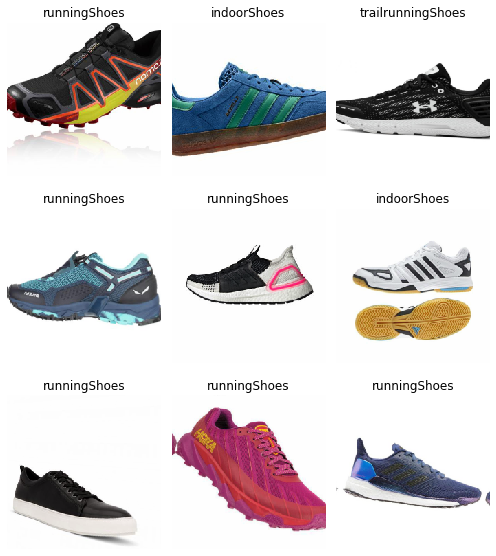

In [0]:
data.show_batch(rows=3, figsize=(7,8))

## Modeling

### Create a learner

Create an appropriate learner for your data
- Choose an appropriate architecture
- Choose appropriate [metrics](https://docs.fast.ai/metrics.html) for your task

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)
#top 5 accuracy doesn't work having just 3 classes 
#and top <=3 accuracy doesn't seam to be a suitable metric here
#since error rate is the same as accuracy (only substracted to 1) I chose to use only accuracy here 

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:04<00:00, 19.9MB/s]


### Find the learning rate



LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.02E-03
Min loss divided by 10: 5.75E-03


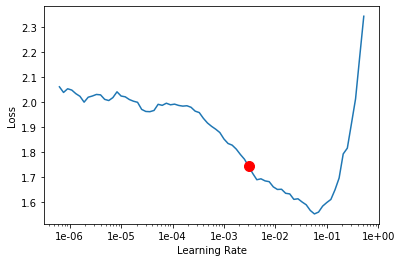

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
#the suggestion seams reasonable
#chose learning rate of 3.02e-3

### Fit the model

Use your knowdledge on model training!

In [0]:
learn.fit_one_cycle(5, max_lr=slice(3.02e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.976709,1.420947,0.426230,00:33
1,1.625008,1.491738,0.557377,00:09
2,1.458120,1.595333,0.557377,00:09
3,1.314093,1.548175,0.540984,00:10
4,1.180881,1.542128,0.532787,00:09


In [0]:
#I'm not quite satified with the outcome yet
#therefore I'm going to train a few more epochs

learn.save('stage-1')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-06
Min loss divided by 10: 1.00E-04


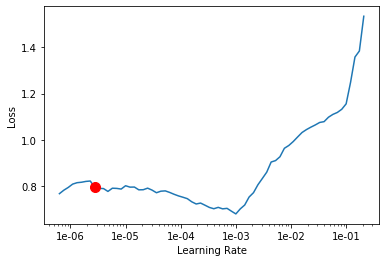

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
#here the suggestion is misleading because of a small drop in the beginning
#instead I chose a new learning rate of 1e-4
#rule of thumb: the slice is passed the new learning rate and a 10th of the old learning rate

In [0]:
learn.fit_one_cycle(10, max_lr=slice(1e-4,3.02e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.918726,1.498781,0.540984,00:09
1,0.826973,1.520194,0.565574,00:09
2,0.778200,1.712253,0.598361,00:09
3,0.703853,1.954898,0.475410,00:09
4,0.634492,1.879320,0.565574,00:09
5,0.601104,1.848930,0.557377,00:09
6,0.555280,1.854157,0.565574,00:09
7,0.523057,1.914471,0.581967,00:09
8,0.484840,1.918982,0.581967,00:09
9,0.451964,1.882565,0.581967,00:09


In [0]:
#the accuracy is still pretty low and the model hasn't overfitted yet
#I'm going to train it again
learn.save('stage-2')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.74E-05
Min loss divided by 10: 6.31E-08


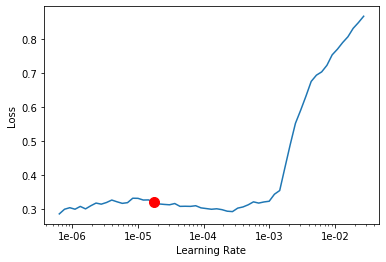

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
#again the suggestion is misleading
#a better choice would be 1e-3
#I'm also going to apply the rule of thumb again
#this time with less epochs and hopefully without overfitting issues

In [0]:
learn.fit_one_cycle(5, max_lr=slice(1e-3,1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.330080,1.926369,0.491803,00:10
1,0.375534,2.610475,0.434426,00:10
2,0.458087,2.023692,0.467213,00:10
3,0.484980,1.395214,0.540984,00:10
4,0.501330,1.590079,0.508197,00:10


In [0]:
#not sure what exactly went wrong but stage 3 of the training process clearly went wrong
#therefore I'll leave it at that and reload stage 2
learn = learn.load('stage-2')

### Evaluate the model

You' ve already seen many ways to evaluate a model. Evaluate your model in a qualitative and quantitative manner.

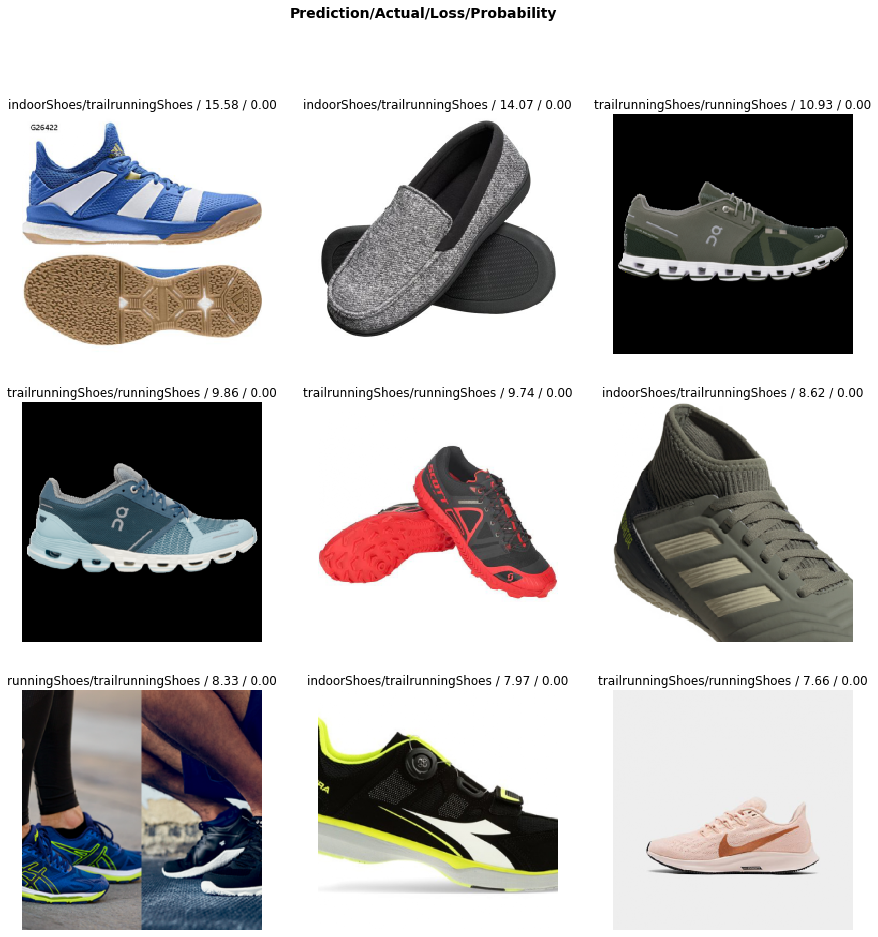

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

interp.plot_top_losses(9, figsize=(15,15))

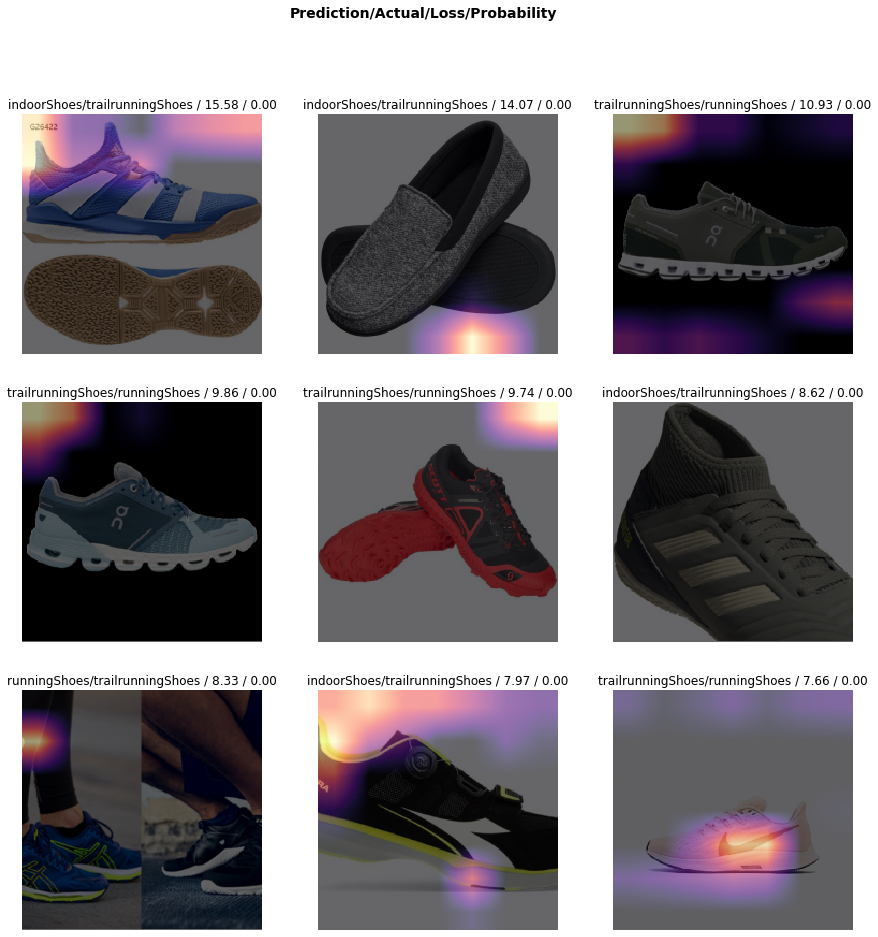

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, heatmap=True, figsize=(15,15))

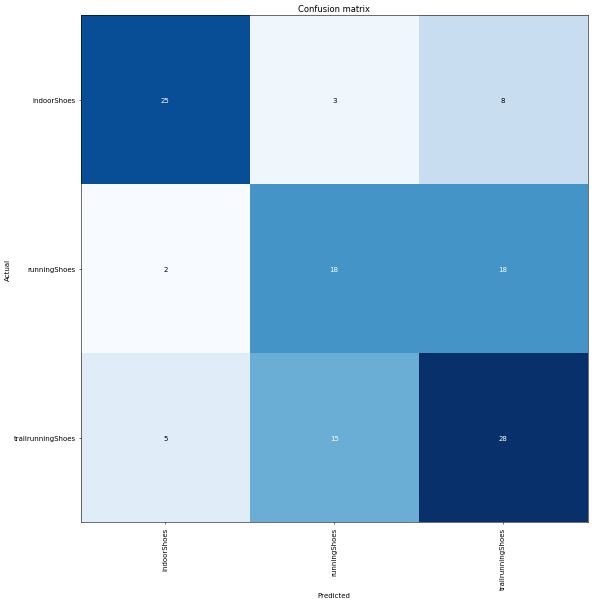

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=50)

## Discussion

You could now export your model using `learn.export` and deploy it somewhere. Discuss the following questions:

- Does the model already solve the task that you designed it for?
- What changes would you make bevore deployment?
- What are the biggest challanges in creating this app?

Does the model already solve the task that you designed it for?
- Since the accuracy is still too low the model requires more training.
- The heatmap also shows that the shoes are not distinguished from each other by their sole as I would have expected to or hoped for. 

What changes would you make before deployment?
- I would select the images more carefully by using more appropriate search terms and excluding more pictures.
- Even though I double checked some house slippers sneaked into my 'indoor shoes' training set. Also I don't like the search term 'indoor shoes' but that is according to my research the correct term for 'Hallenschuhe'.
- I might also include a fourth category 'sneakers' that distinguishes all shoes from those that can't be used for sports.
- I should also come up with a better way to search for images with running and trail running shoes. As one can see in the confusion matrix those two categories get mixed up most often.

What are the biggest challenges in creating this app?
- The biggest challenge was to choose proper training data. Since there seams to be a different interpretation of 'running shoes' I'm not always happy with googles suggestion of a running shoe.
- Another challange was to find a proper learning rate. The suggestion of the learning rate finder had it right only in 1 out of 3 cases. I find it hard to manually select a proper learning rate. It would be awesome if there was a tool that suggests a second or third learning rate if the first suggestion was misleading.
- I also couldn't quite explain to myself why the accuracy suddenly fell in the third modelling stage. Maybe that was because I chose the wrong learning rate or because the training data wasn't good enough or the model started to overfit. I don't have the right feeling yet how many epochs I should train the model and when to stop. I guess it requires more training or maybe there is also a rule of thumb?
